In [2]:
import pandas as pd
df = pd.read_csv(r"D:\archive\covid_19_clean_complete.csv")
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [3]:
df =df.drop(columns=['Province/State'])

In [4]:
df.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [5]:
df.dtypes

Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [36]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49063    False
49064    False
49065    False
49066    False
49067    False
Length: 49068, dtype: bool

In [37]:
df.duplicated().sum()

np.int64(0)

In [38]:
df.duplicated(subset=['Country/Region', 'Date']).sum()

np.int64(13912)

In [12]:
df['Date'] = pd.to_datetime(df['Date'])


In [40]:
invalid_deaths = df[df['Deaths'] > df['Confirmed']]

In [41]:
invalid_recovered = df[df['Recovered'] > df['Confirmed']]


In [42]:
mismatch_active = df[df['Active'] != (df['Confirmed'] - (df['Deaths'] + df['Recovered']))]


In [8]:
df = df.groupby(['Country/Region', 'Date'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()


In [ ]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

In [45]:
df.isnull().sum()

Country/Region    0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
dtype: int64

In [17]:
df.dtypes

Country/Region            object
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
dtype: object

In [47]:
import matplotlib.pyplot as plt

In [50]:
df = df.sort_values('Date')

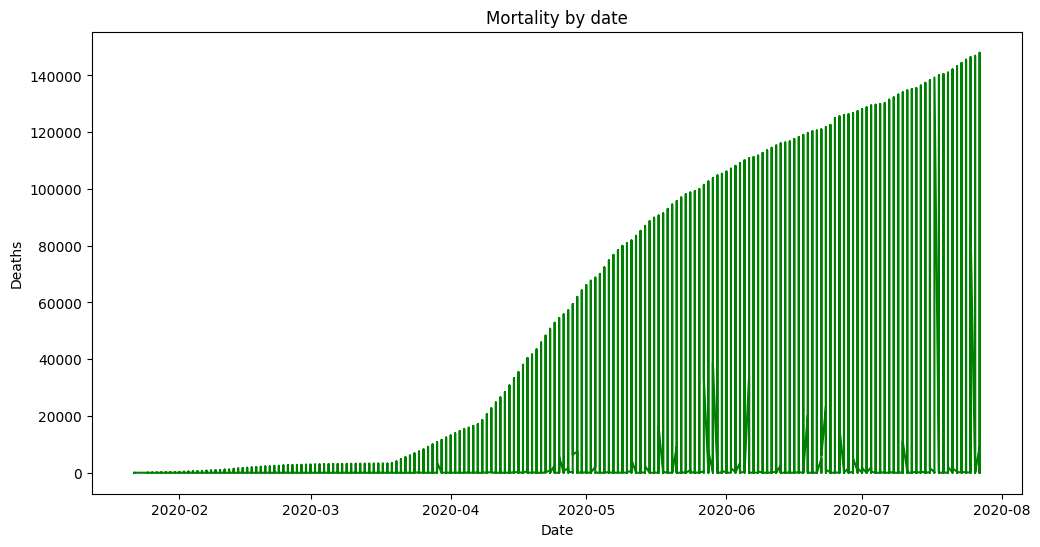

In [51]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Deaths'],color='green')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Mortality by date')
plt.show()

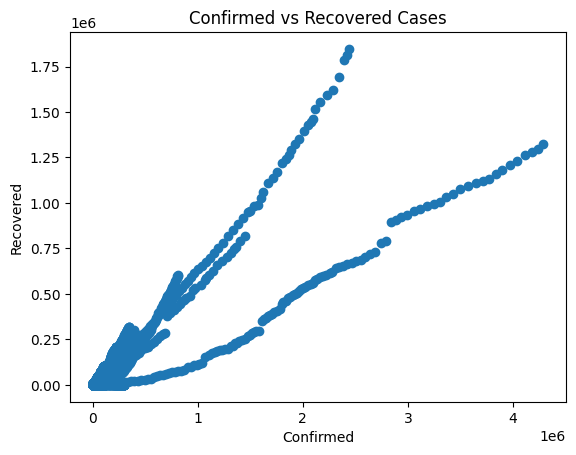

In [52]:
plt.scatter(df['Confirmed'],df['Recovered'])
plt.xlabel('Confirmed')
plt.ylabel('Recovered')
plt.title("Confirmed vs Recovered Cases")
plt.show()

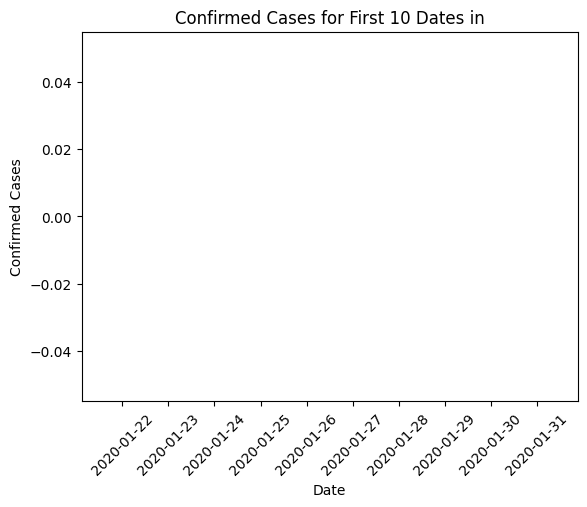

In [18]:
import matplotlib.pyplot as plt

plt.bar(df['Date'][:10], df['Confirmed'][:10])
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases for First 10 Dates in')
plt.xticks(rotation=45)
plt.show()


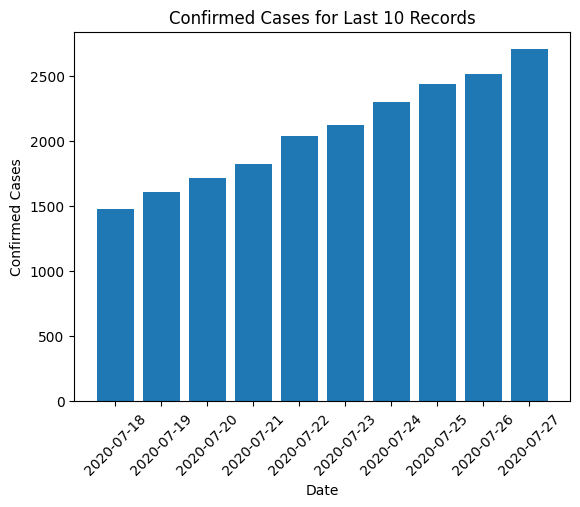

In [16]:
import matplotlib.pyplot as plt

plt.bar(df['Date'].tail(10), df['Confirmed'].tail(10))
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases for Last 10 Records')
plt.xticks(rotation=45)
plt.show()


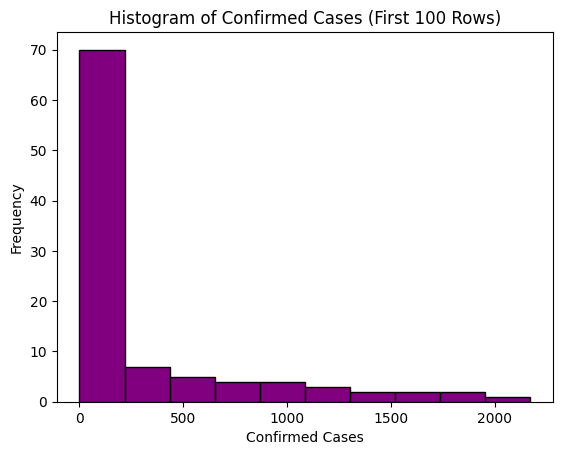

In [20]:
import matplotlib.pyplot as plt


plt.hist(df['Confirmed'][:100], bins=10, color='purple', edgecolor='black')

plt.xlabel('Confirmed Cases')
plt.ylabel('Frequency')
plt.title('Histogram of Confirmed Cases (First 100 Rows)')
plt.show()
